## Applied Deep Learning with TensorFlow, part 1/2


## Setup


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print("TF:", tf.__version__)
np.random.seed(42)
tf.random.set_seed(42)

TF: 2.20.0


## TensorFlow Tensors Basics


In [2]:
# 1) Scalars, vectors, matrices, tensors
scalar = tf.constant(7)  # rank-0
vector = tf.constant([10, 20, 30])  # rank-1
matrix = tf.constant([[1., 2.], [3., 4.]])  # rank-2
tensor = tf.constant([[[1],[2]], [[3],[4]]])  # rank-3 (2x2x1)
print(scalar.shape, vector.shape, matrix.shape, tensor.shape)

() (3,) (2, 2) (2, 2, 1)


## Dtypes and Casting


In [3]:
# 2) Dtypes and casting
x = tf.constant([1.7, 7.4])  # float32 default
y = tf.constant([7, 10])     # int32 default
print(x.dtype, y.dtype)

x16 = tf.cast(x, tf.float16)  # reduced precision floats
y32 = tf.cast(y, tf.float32)  # cast ints -> floats
print(x16.dtype, y32.dtype)

<dtype: 'float32'> <dtype: 'int32'>
<dtype: 'float16'> <dtype: 'float32'>


## Indexing and Shaping


In [4]:
# 3) Indexing and shaping
rank2 = tf.constant([[10, 7], [3, 4]])
last_col = rank2[:, -1]                # column slice
expanded = tf.expand_dims(rank2, -1)   # add channel-like axis
squeezed = tf.squeeze(expanded, axis=-1)

print("rank2 shape:", rank2.shape)
print("last_col:", last_col.numpy(), "shape:", last_col.shape)
print("expanded shape:", expanded.shape)
print("squeezed shape:", squeezed.shape)

rank2 shape: (2, 2)
last_col: [7 4] shape: (2,)
expanded shape: (2, 2, 1)
squeezed shape: (2, 2)


## Broadcasting and Basic Ops


In [5]:
# 4) Broadcasting & basic ops
A = tf.constant([[10., 7.], [3., 4.]])
print("A+10:\n", A + 10)
print("A*2:\n", A * 2)

A+10:
 tf.Tensor(
[[20. 17.]
 [13. 14.]], shape=(2, 2), dtype=float32)
A*2:
 tf.Tensor(
[[20. 14.]
 [ 6.  8.]], shape=(2, 2), dtype=float32)


## Matrix Multiplication


In [6]:
# 5) Matrix multiplication rules (inner dims match)
X = tf.constant([[1, 2], [3, 4], [5, 6]], dtype=tf.float32)      # (3x2)
Y = tf.constant([[7, 8], [9, 10], [11, 12]], dtype=tf.float32)   # (3x2)
XtY = tf.matmul(X, tf.transpose(Y))  # (3x2) @ (2x3) -> (3x3)
print("XtY shape:", XtY.shape)
print(XtY.numpy())

XtY shape: (3, 3)
[[ 23.  29.  35.]
 [ 53.  67.  81.]
 [ 83. 105. 127.]]


## Aggregations


In [7]:
# 6) Aggregations
E = tf.constant(np.random.randint(0, 100, size=10))
print("E:", E.numpy())
print("min:", tf.reduce_min(E).numpy(),
      "max:", tf.reduce_max(E).numpy(),
      "mean:", tf.reduce_mean(tf.cast(E, tf.float32)).numpy(),
      "sum:", tf.reduce_sum(E).numpy())

E: [51 92 14 71 60 20 82 86 74 74]
min: 14 max: 92 mean: 62.4 sum: 624


## One-Hot Encoding


In [8]:
# 7) One-hot encoding
idx = tf.constant([0, 1, 2, 3])
oh = tf.one_hot(idx, depth=4)
print(oh.numpy())

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


## NumPy Interoperability


In [9]:
# 8) NumPy interop
arr = np.array([3., 7., 10.])
t = tf.constant(arr)        # NumPy -> Tensor
back_to_np = t.numpy()      # Tensor -> NumPy
print("arr type:", type(arr))
print("tensor type:", type(t))
print("back_to_np type:", type(back_to_np))

arr type: <class 'numpy.ndarray'>
tensor type: <class 'tensorflow.python.framework.ops.EagerTensor'>
back_to_np type: <class 'numpy.ndarray'>


## Regression (y = x + 10)


Test MAE: 16.30008316040039


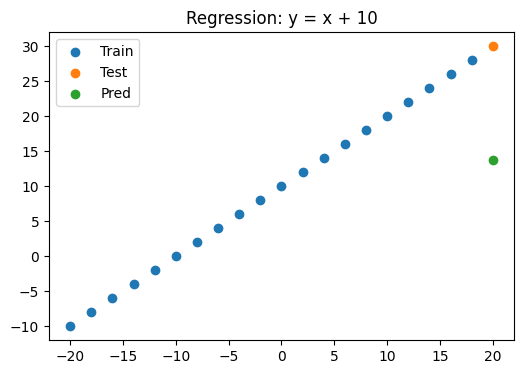

In [10]:
# Regression: y = x + 10
X = np.arange(-20, 21, 2, dtype=np.float32)
y = X + 10

X_train, y_train = X[:20], y[:20]
X_test, y_test = X[20:], y[20:]

reg_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

reg_model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=["mae"]
)

reg_model.fit(X_train, y_train, epochs=200, verbose=0)
loss, mae = reg_model.evaluate(X_test, y_test, verbose=0)
print("Test MAE:", mae)

y_pred = reg_model.predict(X_test, verbose=0).squeeze()
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, label="Train")
plt.scatter(X_test, y_test, label="Test")
plt.scatter(X_test, y_pred, label="Pred")
plt.legend()
plt.title("Regression: y = x + 10")
plt.show()

## Binary Classification (Circles)


Circles test accuracy: 1.000


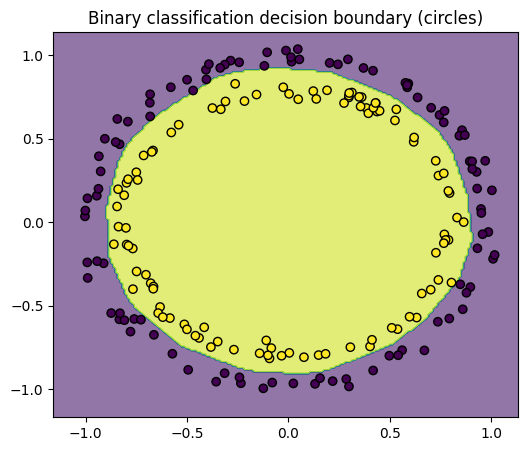

In [11]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# Binary classification on circles
Xc, yc = make_circles(n_samples=1000, noise=0.03, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(Xc, yc, test_size=0.2, random_state=42)

circle_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

circle_model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

circle_model.fit(X_train, y_train, epochs=25, verbose=0)
loss, acc = circle_model.evaluate(X_test, y_test, verbose=0)
print(f"Circles test accuracy: {acc:.3f}")

xx, yy = np.meshgrid(
    np.linspace(Xc[:,0].min()-0.1, Xc[:,0].max()+0.1, 200),
    np.linspace(Xc[:,1].min()-0.1, Xc[:,1].max()+0.1, 200)
)
grid = np.c_[xx.ravel(), yy.ravel()]
probs = circle_model.predict(grid, verbose=0).reshape(xx.shape)

plt.figure(figsize=(6,5))
plt.contourf(xx, yy, (probs > 0.5).astype(int), alpha=0.6)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolor="k")
plt.title("Binary classification decision boundary (circles)")
plt.show()

## Multiclass Classification (Fashion-MNIST)


In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

fashion_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

fashion_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

fashion_model.fit(x_train, y_train, epochs=10, validation_split=0.1, verbose=1)
loss, acc = fashion_model.evaluate(x_test, y_test, verbose=0)
print("Fashion-MNIST test accuracy:", acc)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 632us/step - accuracy: 0.8239 - loss: 0.5018 - val_accuracy: 0.8563 - val_loss: 0.4051
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 591us/step - accuracy: 0.8630 - loss: 0.3789 - val_accuracy: 0.8678 - val_loss: 0.3781
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 622us/step - accuracy: 0.8761 - loss: 0.3381 - val_accuracy: 0.8692 - val_loss: 0.3550
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 605us/step - accuracy: 0.8858 - loss: 0.3147 - val_accuracy: 0.8768 - val_loss: 0.3366
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 599us/step - accuracy: 0.8910 - loss: 0.2965 - val_accuracy: 0.8708 - val_loss: 0.3520
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 582us/step - accuracy: 0.8966 - loss: 0.2816 - val_accuracy: 0.8843 - val_loss: 0.3195
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 582us/step - accuracy: 0.9006 - loss: 0.2691 - val_accuracy: 0.8778 - val_loss: 0.3383
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - accuracy: 0.9041 -

## CNN Binary Classification (Fashion-MNIST: 7 vs 9)


In [7]:
# CNN: binary classification (Fashion-MNIST classes 7 vs 9)
try:
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
except Exception as e:
    raise RuntimeError(
        "Fashion-MNIST download/load failed (needed for CNN 7 vs 9). Often SSL cert issue or blocked download. "
        "See 'Fixing SSL download errors' below. Original error: " + repr(e)
    )

train_mask = np.isin(y_train, [7, 9])
test_mask = np.isin(y_test, [7, 9])

x_train_cnn = x_train[train_mask][..., None].astype("float32") / 255.0
y_train_cnn = (y_train[train_mask] == 9).astype(np.float32)

x_test_cnn = x_test[test_mask][..., None].astype("float32") / 255.0
y_test_cnn = (y_test[test_mask] == 9).astype(np.float32)

cnn_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(16, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

cnn_model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

cnn_model.fit(x_train_cnn, y_train_cnn, epochs=5, validation_split=0.1, verbose=0)
loss, acc = cnn_model.evaluate(x_test_cnn, y_test_cnn, verbose=0)
print("CNN (7 vs 9) test accuracy:", acc)

CNN (7 vs 9) test accuracy: 0.9714999794960022


## CNN Multiclass (CIFAR-10: classes 0–2)


In [2]:
# CIFAR-10 subset (classes 0,1,2) small CNN
from tensorflow.keras import layers, models

try:
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
except Exception as e:
    raise RuntimeError(
        "CIFAR-10 download/load failed. Often SSL cert issue or blocked download. "
        "See 'Fixing SSL download errors' below. Original error: " + repr(e)
    )

mask_train = (y_train < 3).flatten()
mask_test = (y_test < 3).flatten()

x_train = x_train[mask_train].astype("float32")/255.0
y_train = y_train[mask_train].flatten()
x_test = x_test[mask_test].astype("float32")/255.0
y_test = y_test[mask_test].flatten()

cifar_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(32,32,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(3, activation="softmax")
])

cifar_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

cifar_model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

loss, acc = cifar_model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy (tiny CNN):", acc)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 680s 4us/step


/Users/wazed/Semester 4/Pipeline project/IoT Pipeline-Wazed/ML_Task/tf-env/lib/python3.11/site-packages/keras/src/datasets/cifar.py:18: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  d = cPickle.load(f, encoding="bytes")
/Users/wazed/Semester 4/Pipeline project/IoT Pipeline-Wazed/ML_Task/tf-env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.7259 - loss: 0.6576 - val_accuracy: 0.8207 - val_loss: 0.4699
Epoch 2/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8324 - loss: 0.4284 - val_accuracy: 0.8740 - val_loss: 0.3427
Epoch 3/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8674 - loss: 0.3408 - val_accuracy: 0.8813 - val_loss: 0.3240
Epoch 4/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8878 - loss: 0.2957 - val_accuracy: 0.8920 - val_loss: 0.2981
Epoch 5/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9032 - loss: 0.2586 - val_accuracy: 0.9053 - val_loss: 0.2712
Test accuracy (tiny CNN): 0.8893333077430725


In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 24s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 66us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 3s 1us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
